In [2]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder, MultiLabelBinarizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error, mean_squared_error
from xgboost import XGBClassifier, XGBRegressor
import warnings


                                                text  label
0  I grew up (b. 1965) watching and loving the Th...      0
1  When I put this movie in my DVD player, and sa...      0
2  Why do people who do not know what a particula...      0
3  Even though I have great interest in Biblical ...      0
4  Im a die hard Dads Army fan and nothing will e...      1


<AxesSubplot:>

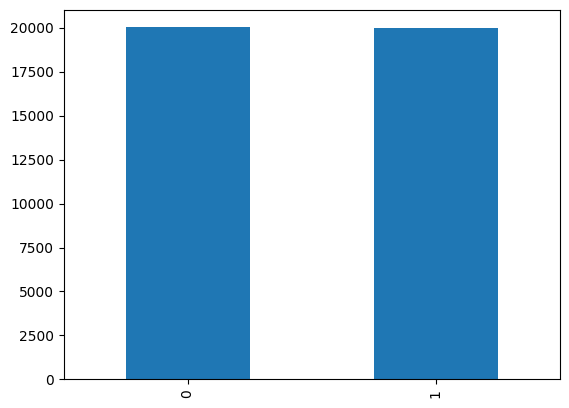

In [3]:
data = pd.read_csv('datasets/movie_reviews/movie_reviews.csv')
print(data.head())

rating_counts = data['label'].value_counts()
rating_counts.plot(kind='bar')

In [4]:
from sklearn.exceptions import UndefinedMetricWarning
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

def print_regression_report(y_val, y_pred, fold):
    print(f'Fold: {fold}')
    print('Mean absolute error:', mean_absolute_error(y_val, y_pred))
    print('Mean squared error:', mean_squared_error(y_val, y_pred))
    print('Root Mean squared error:', np.sqrt(mean_squared_error(y_val, y_pred)))

def print_classification_report(y_val, y_pred, fold):
    print(f'Fold: {fold}')
    print(f'Accuracy Score: {accuracy_score(y_val, y_pred)}')
    print(f'Confusion Matrix: \n {confusion_matrix(y_val, y_pred)}')
    print(f'Classification Report: \n {classification_report(y_val, y_pred)}')

def print_multilabel_classification_report(y_val, y_pred, fold):
    print(f'Fold: {fold}')
    print(f'Accuracy Score: {accuracy_score(y_val, y_pred)}')
    print(f'Confusion Matrix: \n {confusion_matrix(y_val.argmax(axis=1), y_pred.argmax(axis=1))}')
    print(f'Classification Report: \n {classification_report(y_val, y_pred)}')

In [6]:
X, y = data['text'], data['label']

NUM_FOLDS = 5
MAX_FEATURES = 50000
N_GRAMS = 4

vectorizer = TfidfVectorizer(max_features=MAX_FEATURES, ngram_range=(1, N_GRAMS))
label_encoder = LabelEncoder()
X = vectorizer.fit_transform(X)
y = label_encoder.fit_transform(y)

fold = 1

for train_index, val_index in KFold(NUM_FOLDS).split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]

    model = XGBClassifier(n_jobs=-1, random_state=42, max_depth=3, n_estimators=1000, learning_rate=0.4, colsample_bytree=0.1)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    print_classification_report(y_val, y_pred, fold)
    fold += 1





Fold: 1
Accuracy Score: 0.89175
Confusion Matrix: 
 [[3576  493]
 [ 373 3558]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.88      0.89      4069
           1       0.88      0.91      0.89      3931

    accuracy                           0.89      8000
   macro avg       0.89      0.89      0.89      8000
weighted avg       0.89      0.89      0.89      8000

Fold: 2
Accuracy Score: 0.893625
Confusion Matrix: 
 [[3491  474]
 [ 377 3658]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.88      0.89      3965
           1       0.89      0.91      0.90      4035

    accuracy                           0.89      8000
   macro avg       0.89      0.89      0.89      8000
weighted avg       0.89      0.89      0.89      8000

Fold: 3
Accuracy Score: 0.887375
Confusion Matrix: 
 [[3538  490]
 [ 411 3561]]
Classification Report: 
               precision    recal